In [234]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

In [373]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('data_set.csv')

In [374]:
data.head()

,GEO_LON,GEO_LAT,MONTH,WEEKDAY,TIME,ROAD_CONDITION,LIGHT_CONDITION,HUMAN_FACTOR,TU1_DRIVER_ACTION,ROAD_DESCRIPTION,BICYCLE_IND,PEDESTRIAN_IND,INJURY_YN
0,-105.015348,39.730808,8,5,22,DRY,DARK-LIGHTED,OTHER,CARELESS DRIVING,HIGHWAY INTERCHANGE,0.0,0.0,1
1,-105.031846,39.711128,6,4,22,WET,DARK-LIGHTED,DUI/DWAI/DUID,UNKOWN_DRIVER_ACTION,NON INTERSECTION,0.0,1.0,1
2,-104.998843,39.741401,5,2,14,DRY,DAY LIGHT,OTHER,OTHER,NON INTERSECTION,0.0,0.0,1
3,-104.882975,39.777138,11,2,13,DRY,DAY LIGHT,OTHER,LANE VIOLATION,HIGHWAY INTERCHANGE,0.0,0.0,1
4,-104.865889,39.775633,3,1,19,DRY,DARK-LIGHTED,AGGRESSIVE DRIVING,CARELESS DRIVING,HIGHWAY INTERCHANGE,0.0,0.0,1


In [375]:
data.shape

(8000, 13)

In [436]:
#ADD TARGET VARIABLE AS A STRING
data['Y_N'] = data['INJURY_YN'].apply(lambda x: 'Y' if x == 1 else 'N')

In [376]:
data['ROAD_CONDITION'].unique()

array(['DRY', 'WET', 'SLUSHY WITH VISIBLE ICY ROAD TREATMENT',
       'SNOWY WITH VISIBLE ICY ROAD TREATMENT', 'ICY', 'MUDDY', 'SLUSHY',
       'SNOWY', 'UNKOWN_ROAD', 'WET WITH VISIBLE ICY ROAD TREATMENT',
       'DRY WITH VISIBLE ICY ROAD TREATMENT', 'FOREIGN MATERIAL',
       'UNDER_INVESTIGATION_ROAD', 'ICY WITH VISIBLE ICY ROAD TREATMENT'],
      dtype=object)

In [377]:
data['LIGHT_CONDITION'].unique()

array(['DARK-LIGHTED', 'DAY LIGHT', 'DAWN OR DUSK', 'DARK-UNLIGHTED',
       'UNKOWN_LIGHT', 'UNDER_INVESTIGATION_LIGHT'], dtype=object)

In [300]:
data['HUMAN_FACTOR'].nunique()

13

In [438]:
df = data

In [439]:
df = pd.concat([df,pd.get_dummies(df['HUMAN_FACTOR'])], axis=1)
df

,GEO_LON,GEO_LAT,MONTH,WEEKDAY,TIME,ROAD_CONDITION,LIGHT_CONDITION,HUMAN_FACTOR,TU1_DRIVER_ACTION,ROAD_DESCRIPTION,BICYCLE_IND,PEDESTRIAN_IND,INJURY_YN,Y_N,AGGRESSIVE DRIVING,ASLEEP AT THE WHEEL,DISTRACTED,DRIVER EMOTIONALLY UPSET,DRIVER FATIGUE,DRIVER INEXPERIENCE,DRIVER UNFAMILIAR WITH AREA,DUI/DWAI/DUID,EVADING LAW ENFORCEMENT OFFICER,ILLNESS/MEDICAL,OTHER,PHYSICAL DISABILITY,UNDER INVESTIGATION
0,-105.015348,39.730808,8,5,22,DRY,DARK-LIGHTED,OTHER,CARELESS DRIVING,HIGHWAY INTERCHANGE,0.0,0.0,1,Y,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-105.031846,39.711128,6,4,22,WET,DARK-LIGHTED,DUI/DWAI/DUID,UNKOWN_DRIVER_ACTION,NON INTERSECTION,0.0,1.0,1,Y,0,0,0,0,0,0,0,1,0,0,0,0,0
2,-104.998843,39.741401,5,2,14,DRY,DAY LIGHT,OTHER,OTHER,NON INTERSECTION,0.0,0.0,1,Y,0,0,0,0,0,0,0,0,0,0,1,0,0
3,-104.882975,39.777138,11,2,13,DRY,DAY LIGHT,OTHER,LANE VIOLATION,HIGHWAY INTERCHANGE,0.0,0.0,1,Y,0,0,0,0,0,0,0,0,0,0,1,0,0
4,-104.865889,39.775633,3,1,19,DRY,DARK-LIGHTED,AGGRESSIVE DRIVING,CARELESS DRIVING,HIGHWAY INTERCHANGE,0.0,0.0,1,Y,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-105.025230,39.751207,6,6,16,DRY,DAY LIGHT,OTHER,FOLLOWED TOO CLOSELY,NON INTERSECTION,0.0,0.0,0,N,0,0,0,0,0,0,0,0,0,0,1,0,0
7996,-105.034610,39.762138,6,1,18,DRY,DAWN OR DUSK,OTHER,CARELESS DRIVING,NON INTERSECTION,0.0,0.0,0,N,0,0,0,0,0,0,0,0,0,0,1,0,0
7997,-104.814705,39.794379,3,5,12,DRY,DAY LIGHT,DRIVER INEXPERIENCE,FAILED TO YIELD ROW,AT INTERSECTION,0.0,0.0,0,N,0,0,0,0,0,1,0,0,0,0,0,0,0
7998,-104.903571,39.778422,12,5,17,DRY,DARK-LIGHTED,DRIVER UNFAMILIAR WITH AREA,DISREGARDED OTHER DEVICE,HIGHWAY INTERCHANGE,0.0,0.0,0,N,0,0,0,0,0,0,1,0,0,0,0,0,0


In [440]:
df = pd.concat([df,pd.get_dummies(df['ROAD_CONDITION'])], axis=1)
df

,GEO_LON,GEO_LAT,MONTH,WEEKDAY,TIME,ROAD_CONDITION,LIGHT_CONDITION,HUMAN_FACTOR,TU1_DRIVER_ACTION,ROAD_DESCRIPTION,BICYCLE_IND,PEDESTRIAN_IND,INJURY_YN,Y_N,AGGRESSIVE DRIVING,ASLEEP AT THE WHEEL,DISTRACTED,DRIVER EMOTIONALLY UPSET,DRIVER FATIGUE,DRIVER INEXPERIENCE,DRIVER UNFAMILIAR WITH AREA,DUI/DWAI/DUID,EVADING LAW ENFORCEMENT OFFICER,ILLNESS/MEDICAL,OTHER,PHYSICAL DISABILITY,UNDER INVESTIGATION,DRY,DRY WITH VISIBLE ICY ROAD TREATMENT,FOREIGN MATERIAL,ICY,ICY WITH VISIBLE ICY ROAD TREATMENT,MUDDY,SLUSHY,SLUSHY WITH VISIBLE ICY ROAD TREATMENT,SNOWY,SNOWY WITH VISIBLE ICY ROAD TREATMENT,UNDER_INVESTIGATION_ROAD,UNKOWN_ROAD,WET,WET WITH VISIBLE ICY ROAD TREATMENT
0,-105.015348,39.730808,8,5,22,DRY,DARK-LIGHTED,OTHER,CARELESS DRIVING,HIGHWAY INTERCHANGE,0.0,0.0,1,Y,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-105.031846,39.711128,6,4,22,WET,DARK-LIGHTED,DUI/DWAI/DUID,UNKOWN_DRIVER_ACTION,NON INTERSECTION,0.0,1.0,1,Y,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,-104.998843,39.741401,5,2,14,DRY,DAY LIGHT,OTHER,OTHER,NON INTERSECTION,0.0,0.0,1,Y,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-104.882975,39.777138,11,2,13,DRY,DAY LIGHT,OTHER,LANE VIOLATION,HIGHWAY INTERCHANGE,0.0,0.0,1,Y,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-104.865889,39.775633,3,1,19,DRY,DARK-LIGHTED,AGGRESSIVE DRIVING,CARELESS DRIVING,HIGHWAY INTERCHANGE,0.0,0.0,1,Y,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-105.025230,39.751207,6,6,16,DRY,DAY LIGHT,OTHER,FOLLOWED TOO CLOSELY,NON INTERSECTION,0.0,0.0,0,N,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7996,-105.034610,39.762138,6,1,18,DRY,DAWN OR DUSK,OTHER,CARELESS DRIVING,NON INTERSECTION,0.0,0.0,0,N,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7997,-104.814705,39.794379,3,5,12,DRY,DAY LIGHT,DRIVER INEXPERIENCE,FAILED TO YIELD ROW,AT INTERSECTION,0.0,0.0,0,N,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7998,-104.903571,39.778422,12,5,17,DRY,DARK-LIGHTED,DRIVER UNFAMILIAR WITH AREA,DISREGARDED OTHER DEVICE,HIGHWAY INTERCHANGE,0.0,0.0,0,N,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [441]:
df = pd.concat([df,pd.get_dummies(df['LIGHT_CONDITION'])], axis=1)
df

,GEO_LON,GEO_LAT,MONTH,WEEKDAY,TIME,ROAD_CONDITION,LIGHT_CONDITION,HUMAN_FACTOR,TU1_DRIVER_ACTION,ROAD_DESCRIPTION,BICYCLE_IND,PEDESTRIAN_IND,INJURY_YN,Y_N,AGGRESSIVE DRIVING,ASLEEP AT THE WHEEL,DISTRACTED,DRIVER EMOTIONALLY UPSET,DRIVER FATIGUE,DRIVER INEXPERIENCE,DRIVER UNFAMILIAR WITH AREA,DUI/DWAI/DUID,EVADING LAW ENFORCEMENT OFFICER,ILLNESS/MEDICAL,OTHER,PHYSICAL DISABILITY,UNDER INVESTIGATION,DRY,DRY WITH VISIBLE ICY ROAD TREATMENT,FOREIGN MATERIAL,ICY,ICY WITH VISIBLE ICY ROAD TREATMENT,MUDDY,SLUSHY,SLUSHY WITH VISIBLE ICY ROAD TREATMENT,SNOWY,SNOWY WITH VISIBLE ICY ROAD TREATMENT,UNDER_INVESTIGATION_ROAD,UNKOWN_ROAD,WET,WET WITH VISIBLE ICY ROAD TREATMENT,DARK-LIGHTED,DARK-UNLIGHTED,DAWN OR DUSK,DAY LIGHT,UNDER_INVESTIGATION_LIGHT,UNKOWN_LIGHT
0,-105.015348,39.730808,8,5,22,DRY,DARK-LIGHTED,OTHER,CARELESS DRIVING,HIGHWAY INTERCHANGE,0.0,0.0,1,Y,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,-105.031846,39.711128,6,4,22,WET,DARK-LIGHTED,DUI/DWAI/DUID,UNKOWN_DRIVER_ACTION,NON INTERSECTION,0.0,1.0,1,Y,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,-104.998843,39.741401,5,2,14,DRY,DAY LIGHT,OTHER,OTHER,NON INTERSECTION,0.0,0.0,1,Y,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,-104.882975,39.777138,11,2,13,DRY,DAY LIGHT,OTHER,LANE VIOLATION,HIGHWAY INTERCHANGE,0.0,0.0,1,Y,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,-104.865889,39.775633,3,1,19,DRY,DARK-LIGHTED,AGGRESSIVE DRIVING,CARELESS DRIVING,HIGHWAY INTERCHANGE,0.0,0.0,1,Y,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-105.025230,39.751207,6,6,16,DRY,DAY LIGHT,OTHER,FOLLOWED TOO CLOSELY,NON INTERSECTION,0.0,0.0,0,N,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7996,-105.034610,39.762138,6,1,18,DRY,DAWN OR DUSK,OTHER,CARELESS DRIVING,NON INTERSECTION,0.0,0.0,0,N,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7997,-104.814705,39.794379,3,5,12,DRY,DAY LIGHT,DRIVER INEXPERIENCE,FAILED TO YIELD ROW,AT INTERSECTION,0.0,0.0,0,N,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7998,-104.903571,39.778422,12,5,17,DRY,DARK-LIGHTED,DRIVER UNFAMILIAR WITH AREA,DISREGARDED OTHER DEVICE,HIGHWAY INTERCHANGE,0.0,0.0,0,N,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [442]:
df = pd.concat([df,pd.get_dummies(df['TU1_DRIVER_ACTION'])], axis=1)
df 

,GEO_LON,GEO_LAT,MONTH,WEEKDAY,TIME,ROAD_CONDITION,LIGHT_CONDITION,HUMAN_FACTOR,TU1_DRIVER_ACTION,ROAD_DESCRIPTION,BICYCLE_IND,PEDESTRIAN_IND,INJURY_YN,Y_N,AGGRESSIVE DRIVING,ASLEEP AT THE WHEEL,DISTRACTED,DRIVER EMOTIONALLY UPSET,DRIVER FATIGUE,DRIVER INEXPERIENCE,DRIVER UNFAMILIAR WITH AREA,DUI/DWAI/DUID,EVADING LAW ENFORCEMENT OFFICER,ILLNESS/MEDICAL,OTHER,PHYSICAL DISABILITY,UNDER INVESTIGATION,DRY,DRY WITH VISIBLE ICY ROAD TREATMENT,FOREIGN MATERIAL,ICY,ICY WITH VISIBLE ICY ROAD TREATMENT,MUDDY,SLUSHY,SLUSHY WITH VISIBLE ICY ROAD TREATMENT,SNOWY,SNOWY WITH VISIBLE ICY ROAD TREATMENT,UNDER_INVESTIGATION_ROAD,UNKOWN_ROAD,WET,WET WITH VISIBLE ICY ROAD TREATMENT,DARK-LIGHTED,DARK-UNLIGHTED,DAWN OR DUSK,DAY LIGHT,UNDER_INVESTIGATION_LIGHT,UNKOWN_LIGHT,CARELESS DRIVING,DISREGARD STOP SIGN,DISREGARDED OTHER DEVICE,EXCEED SAFE/POSTED SPEED,FAILED TO STOP AT SIGNAL,FAILED TO YIELD ROW,FOLLOWED TOO CLOSELY,IMPEDED TRAFFIC,IMPROPER BACKING,IMPROPER PASSING ON LEFT,IMPROPER PASSING ON RIGHT,IMPROPER TURN,LANE VIOLATION,OTHER,OTHER IMPROPER TURNS,RECKLESS DRIVING,SIGNALING VIOLATION,TURNED FROM WRONG LANE OR POSITION,UNDER INVESTIGATION,UNKOWN_DRIVER_ACTION
0,-105.015348,39.730808,8,5,22,DRY,DARK-LIGHTED,OTHER,CARELESS DRIVING,HIGHWAY INTERCHANGE,0.0,0.0,1,Y,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-105.031846,39.711128,6,4,22,WET,DARK-LIGHTED,DUI/DWAI/DUID,UNKOWN_DRIVER_ACTION,NON INTERSECTION,0.0,1.0,1,Y,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-104.998843,39.741401,5,2,14,DRY,DAY LIGHT,OTHER,OTHER,NON INTERSECTION,0.0,0.0,1,Y,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,-104.882975,39.777138,11,2,13,DRY,DAY LIGHT,OTHER,LANE VIOLATION,HIGHWAY INTERCHANGE,0.0,0.0,1,Y,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,-104.865889,39.775633,3,1,19,DRY,DARK-LIGHTED,AGGRESSIVE DRIVING,CARELESS DRIVING,HIGHWAY INTERCHANGE,0.0,0.0,1,Y,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-105.025230,39.751207,6,6,16,DRY,DAY LIGHT,OTHER,FOLLOWED TOO CLOSELY,NON INTERSECTION,0.0,0.0,0,N,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7996,-105.034610,39.762138,6,1,18,DRY,DAWN OR DUSK,OTHER,CARELESS DRIVING,NON INTERSECTION,0.0,0.0,0,N,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7997,-104.814705,39.794379,3,5,12,DRY,DAY LIGHT,DRIVER INEXPERIENCE,FAILED TO YIELD ROW,AT INTERSECTION,0.0,0.0,0,N,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7998,-104.903571,39.778422,12,5,17,DRY,DARK-LIGHTED,DRIVER UNFAMILIAR WITH AREA,DISREGARDED OTHER DEVICE,HIGHWAY INTERCHANGE,0.0,0.0,0,N,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [443]:
df = pd.concat([df,pd.get_dummies(df['ROAD_DESCRIPTION'])], axis=1)
df

,GEO_LON,GEO_LAT,MONTH,WEEKDAY,TIME,ROAD_CONDITION,LIGHT_CONDITION,HUMAN_FACTOR,TU1_DRIVER_ACTION,ROAD_DESCRIPTION,BICYCLE_IND,PEDESTRIAN_IND,INJURY_YN,Y_N,AGGRESSIVE DRIVING,ASLEEP AT THE WHEEL,DISTRACTED,DRIVER EMOTIONALLY UPSET,DRIVER FATIGUE,DRIVER INEXPERIENCE,DRIVER UNFAMILIAR WITH AREA,DUI/DWAI/DUID,EVADING LAW ENFORCEMENT OFFICER,ILLNESS/MEDICAL,OTHER,PHYSICAL DISABILITY,UNDER INVESTIGATION,DRY,DRY WITH VISIBLE ICY ROAD TREATMENT,FOREIGN MATERIAL,ICY,ICY WITH VISIBLE ICY ROAD TREATMENT,MUDDY,SLUSHY,SLUSHY WITH VISIBLE ICY ROAD TREATMENT,SNOWY,SNOWY WITH VISIBLE ICY ROAD TREATMENT,UNDER_INVESTIGATION_ROAD,UNKOWN_ROAD,WET,WET WITH VISIBLE ICY ROAD TREATMENT,DARK-LIGHTED,DARK-UNLIGHTED,DAWN OR DUSK,DAY LIGHT,UNDER_INVESTIGATION_LIGHT,UNKOWN_LIGHT,CARELESS DRIVING,DISREGARD STOP SIGN,DISREGARDED OTHER DEVICE,EXCEED SAFE/POSTED SPEED,FAILED TO STOP AT SIGNAL,FAILED TO YIELD ROW,FOLLOWED TOO CLOSELY,IMPEDED TRAFFIC,IMPROPER BACKING,IMPROPER PASSING ON LEFT,IMPROPER PASSING ON RIGHT,IMPROPER TURN,LANE VIOLATION,OTHER,OTHER IMPROPER TURNS,RECKLESS DRIVING,SIGNALING VIOLATION,TURNED FROM WRONG LANE OR POSITION,UNDER INVESTIGATION,UNKOWN_DRIVER_ACTION,ALLEY RELATED,AT INTERSECTION,DRIVEWAY ACCESS RELATED,HIGHWAY INTERCHANGE,INTERSECTION RELATED,NON INTERSECTION,PARKING LOT,ROUNDABOUT,UNDER INVESTIGATION,UNKOWN_ROAD_DESCR
0,-105.015348,39.730808,8,5,22,DRY,DARK-LIGHTED,OTHER,CARELESS DRIVING,HIGHWAY INTERCHANGE,0.0,0.0,1,Y,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,-105.031846,39.711128,6,4,22,WET,DARK-LIGHTED,DUI/DWAI/DUID,UNKOWN_DRIVER_ACTION,NON INTERSECTION,0.0,1.0,1,Y,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,-104.998843,39.741401,5,2,14,DRY,DAY LIGHT,OTHER,OTHER,NON INTERSECTION,0.0,0.0,1,Y,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,-104.882975,39.777138,11,2,13,DRY,DAY LIGHT,OTHER,LANE VIOLATION,HIGHWAY INTERCHANGE,0.0,0.0,1,Y,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,-104.865889,39.775633,3,1,19,DRY,DARK-LIGHTED,AGGRESSIVE DRIVING,CARELESS DRIVING,HIGHWAY INTERCHANGE,0.0,0.0,1,Y,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-105.025230,39.751207,6,6,16,DRY,DAY LIGHT,OTHER,FOLLOWED TOO CLOSELY,NON INTERSECTION,0.0,0.0,0,N,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7996,-105.034610,39.762138,6,1,18,DRY,DAWN OR DUSK,OTHER,CARELESS DRIVING,NON INTERSECTION,0.0,0.0,0,N,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7997,-104.814705,39.794379,3,5,12,DRY,DAY LIGHT,DRIVER INEXPERIENCE,FAILED TO YIELD ROW,AT INTERSECTION,0.0,0.0,0,N,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7998,-104.903571,39.778422,12,5,17,DRY,DARK-LIGHTED,DRIVER UNFAMILIAR WITH AREA,DISREGARDED OTHER DEVICE,HIGHWAY INTERCHANGE,0.0,0.0,0,N,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [444]:
df.drop(columns=[
    'ROAD_CONDITION', 'LIGHT_CONDITION','HUMAN_FACTOR', 
    'TU1_DRIVER_ACTION','ROAD_DESCRIPTION'], inplace=True)
df

,GEO_LON,GEO_LAT,MONTH,WEEKDAY,TIME,BICYCLE_IND,PEDESTRIAN_IND,INJURY_YN,Y_N,AGGRESSIVE DRIVING,ASLEEP AT THE WHEEL,DISTRACTED,DRIVER EMOTIONALLY UPSET,DRIVER FATIGUE,DRIVER INEXPERIENCE,DRIVER UNFAMILIAR WITH AREA,DUI/DWAI/DUID,EVADING LAW ENFORCEMENT OFFICER,ILLNESS/MEDICAL,OTHER,PHYSICAL DISABILITY,UNDER INVESTIGATION,DRY,DRY WITH VISIBLE ICY ROAD TREATMENT,FOREIGN MATERIAL,ICY,ICY WITH VISIBLE ICY ROAD TREATMENT,MUDDY,SLUSHY,SLUSHY WITH VISIBLE ICY ROAD TREATMENT,SNOWY,SNOWY WITH VISIBLE ICY ROAD TREATMENT,UNDER_INVESTIGATION_ROAD,UNKOWN_ROAD,WET,WET WITH VISIBLE ICY ROAD TREATMENT,DARK-LIGHTED,DARK-UNLIGHTED,DAWN OR DUSK,DAY LIGHT,UNDER_INVESTIGATION_LIGHT,UNKOWN_LIGHT,CARELESS DRIVING,DISREGARD STOP SIGN,DISREGARDED OTHER DEVICE,EXCEED SAFE/POSTED SPEED,FAILED TO STOP AT SIGNAL,FAILED TO YIELD ROW,FOLLOWED TOO CLOSELY,IMPEDED TRAFFIC,IMPROPER BACKING,IMPROPER PASSING ON LEFT,IMPROPER PASSING ON RIGHT,IMPROPER TURN,LANE VIOLATION,OTHER,OTHER IMPROPER TURNS,RECKLESS DRIVING,SIGNALING VIOLATION,TURNED FROM WRONG LANE OR POSITION,UNDER INVESTIGATION,UNKOWN_DRIVER_ACTION,ALLEY RELATED,AT INTERSECTION,DRIVEWAY ACCESS RELATED,HIGHWAY INTERCHANGE,INTERSECTION RELATED,NON INTERSECTION,PARKING LOT,ROUNDABOUT,UNDER INVESTIGATION,UNKOWN_ROAD_DESCR
0,-105.015348,39.730808,8,5,22,0.0,0.0,1,Y,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,-105.031846,39.711128,6,4,22,0.0,1.0,1,Y,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,-104.998843,39.741401,5,2,14,0.0,0.0,1,Y,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,-104.882975,39.777138,11,2,13,0.0,0.0,1,Y,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,-104.865889,39.775633,3,1,19,0.0,0.0,1,Y,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-105.025230,39.751207,6,6,16,0.0,0.0,0,N,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7996,-105.034610,39.762138,6,1,18,0.0,0.0,0,N,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7997,-104.814705,39.794379,3,5,12,0.0,0.0,0,N,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7998,-104.903571,39.778422,12,5,17,0.0,0.0,0,N,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [446]:
Feature = df

In [447]:
Feature.drop(columns=['INJURY_YN',\
                      'Y_N'
                      #'BICYCLE_IND','PEDESTRIAN_IND' #if keep better for decision tree, KNN, and SVM; but not for logistic regression
                     ], inplace=True)
#Feature.reset_index(inplace=True)
#'INJURY_YN','GEO_LAT','GEO_LON',

In [448]:
Feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 70 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   GEO_LON                                 8000 non-null   float64
 1   GEO_LAT                                 8000 non-null   float64
 2   MONTH                                   8000 non-null   int64  
 3   WEEKDAY                                 8000 non-null   int64  
 4   TIME                                    8000 non-null   int64  
 5   BICYCLE_IND                             8000 non-null   float64
 6   PEDESTRIAN_IND                          8000 non-null   float64
 7   AGGRESSIVE DRIVING                      8000 non-null   uint8  
 8   ASLEEP AT THE WHEEL                     8000 non-null   uint8  
 9   DISTRACTED                              8000 non-null   uint8  
 10  DRIVER EMOTIONALLY UPSET                8000 non-null   uint

df1 = pd.DataFrame(
            [np.ones(14)*0], 
            index=df.index, 
            columns=[
                'DRY', 'WET', 'SLUSHY WITH VISIBLE ICY ROAD TREATMENT',
                'SNOWY WITH VISIBLE ICY ROAD TREATMENT', 'ICY', 'MUDDY', 'SLUSHY',
                'SNOWY', 'UNKOWN_ROAD', 'WET WITH VISIBLE ICY ROAD TREATMENT',
                'DRY WITH VISIBLE ICY ROAD TREATMENT', 'FOREIGN MATERIAL',
                'ICY WITH VISIBLE ICY ROAD TREATMENT', 'UNDER INVESTIGATION_ROAD'
            ]
        )
df1

np.ones(14)*0

dfcomb = pd.concat(
    [df1, df2, df3
    ], axis=1
)
dfcomb

In [449]:
#y = data['INJURY_YN'].values
y = data['Y_N'].values
y

array(['Y', 'Y', 'Y', ..., 'N', 'N', 'N'], dtype=object)

In [393]:
X= preprocessing.StandardScaler().fit(Feature).transform(Feature)
X[0:5]

array([[-0.79506867, -0.03421242,  0.42109679,  1.02756851,  1.51802842,
        -0.20607567, -0.3483033 , -0.35111249, -0.0776931 , -0.33702484,
        -0.04748762, -0.07930516, -0.26474697, -0.18364446, -0.31352454,
        -0.07604771, -0.11915865,  0.880574  , -0.05006262, -0.02500782,
         0.40577431, -0.04034408, -0.01581337, -0.16458884, -0.01581337,
        -0.01118104, -0.06237046, -0.03537746, -0.13870155, -0.04186965,
        -0.02500782, -0.13442751, -0.26851189, -0.03710651,  1.5594882 ,
        -0.1521471 , -0.20775172, -1.29099445, -0.02500782, -0.13916893,
         1.55760207, -0.13297454, -0.05598925, -0.15723042, -0.24384898,
        -0.41430202, -0.35959071, -0.04614678, -0.14056247, -0.04879195,
        -0.04034408, -0.12076694, -0.25626556, -0.30820516, -0.0603174 ,
        -0.21325643, -0.02959335, -0.09395338, -0.02500782, -0.33472049,
        -0.10903992, -0.78495963, -0.17166402,  3.90220201, -0.2916162 ,
        -0.7675894 , -0.22331316, -0.0548546 , -0.0

In [352]:
from sklearn.model_selection import train_test_split

In [312]:
from sklearn.tree import DecisionTreeClassifier

In [450]:
dtX_trainset, dtX_testset, dty_trainset, dty_testset = train_test_split(X, y, test_size=0.2, random_state=3)

In [451]:
Tree = DecisionTreeClassifier(criterion="entropy")
Tree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy')

In [452]:
Tree.fit(dtX_trainset,dty_trainset)

DecisionTreeClassifier(criterion='entropy')

In [453]:
predTree = Tree.predict(dtX_testset)
print (predTree [0:10])
print (dty_testset [0:10])

['Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'N']
['N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N']


In [454]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(dty_testset, predTree))

DecisionTrees's Accuracy:  0.6425


In [455]:
f1_score(dty_testset, predTree, average='weighted')

0.6424798904993156

In [400]:
lgX_train, lgX_test, lgy_train, lgy_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [401]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(lgX_train,lgy_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [402]:
lgyhat = LR.predict(lgX_test)
lgyhat

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [403]:
yhat_prob = LR.predict_proba(lgX_test)
yhat_prob[:5]

array([[0.53345983, 0.46654017],
       [0.95654687, 0.04345313],
       [0.71199471, 0.28800529],
       [0.96795215, 0.03204785],
       [0.52708564, 0.47291436]])

In [404]:
from sklearn.metrics import log_loss
log_loss(lgy_test, yhat_prob)

0.522634277004229

In [405]:
from sklearn.model_selection import train_test_split
knnX_train, knnX_test, knny_train, knny_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', knnX_train.shape,  knny_train.shape)
print ('Test set:', knnX_test.shape,  knny_test.shape)

Train set: (6400, 70) (6400,)
Test set: (1600, 70) (1600,)


In [406]:
from sklearn.neighbors import KNeighborsClassifier

In [407]:
#create graph to determine best k value
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(knnX_train,knny_train)
    knnyhat=neigh.predict(knnX_test)
    mean_acc[n-1] = metrics.accuracy_score(knny_test, knnyhat)

    
    std_acc[n-1]=np.std(knnyhat==knny_test)/np.sqrt(knnyhat.shape[0])

mean_acc

array([0.636875, 0.654375, 0.678125, 0.674375, 0.70375 , 0.69    ,
       0.70375 , 0.695625, 0.7025  ])

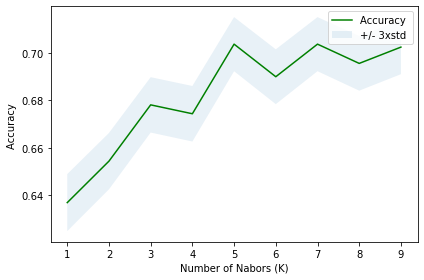

In [408]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [412]:
k = 5
neigh7 = KNeighborsClassifier(n_neighbors = k).fit(knnX_train,knny_train)
yhat7 = neigh7.predict(knnX_test)
print("Train set Accuracy: ", metrics.accuracy_score(knny_train, neigh7.predict(knnX_train)))
print("Test set Accuracy: ", metrics.accuracy_score(knny_test, yhat7))

Train set Accuracy:  0.78484375
Test set Accuracy:  0.70375


In [413]:
svmX_train, svmX_test, svmy_train, svmy_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', svmX_train.shape,  svmy_train.shape)
print ('Test set:', svmX_test.shape,  svmy_test.shape)

Train set: (6400, 70) (6400,)
Test set: (1600, 70) (1600,)


In [414]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(svmX_train, svmy_train) 

SVC()

In [415]:
svmyhat = clf.predict(svmX_test)
svmyhat [0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [290]:
from sklearn.metrics import jaccard_similarity_score

ImportError: cannot import name 'jaccard_similarity_score' from 'sklearn.metrics' (C:\Users\Deidra\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [232]:
from sklearn.metrics import f1_score

In [416]:
clf2 = svm.SVC(kernel='linear')
clf2.fit(svmX_train, svmy_train) 
yhat2 = clf2.predict(svmX_test)
print("Avg F1-score: %.4f" % f1_score(svmy_test, yhat2, average='weighted'))
#print("Jaccard score: %.4f" % jaccard_similarity_score(svmy_test, yhat2))

Avg F1-score: 0.7220


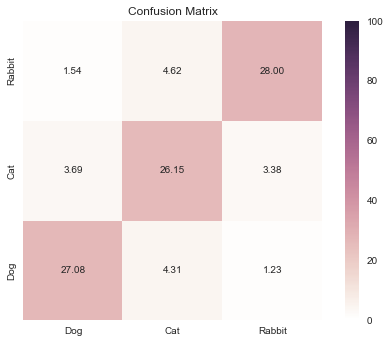

In [1]:
#/usr/bin/env python

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

import seaborn as sns
import math

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib as mpl

mpl.style.use('seaborn')

conf_arr = np.array([[88,14,4],[12,85,11],[5,15,91]])

sum = conf_arr.sum()

conf_arr = conf_arr * 100.0 / ( 1.0 * sum )

df_cm = pd.DataFrame(conf_arr, 
  index = [ 'Dog', 'Cat', 'Rabbit'],
  columns = ['Dog', 'Cat', 'Rabbit'])

fig = plt.figure()

plt.clf()

ax = fig.add_subplot(111)
ax.set_aspect(1)

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

res = sn.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0, fmt='.2f', cmap=cmap)

res.invert_yaxis()

plt.yticks([0.5,1.5,2.5], [ 'Dog', 'Cat', 'Rabbit'],va='center')

plt.title('Confusion Matrix')

plt.savefig('confusion_matrix.png', dpi=100, bbox_inches='tight' )

#plt.close()

In [425]:
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y
#!pip install --upgrade scikit-learn==0.20.3

  Created wheel for scikit-learn: filename=scikit_learn-0.20.3-cp38-cp38-win_amd64.whl size=5041029 sha256=4b8850dd539d0f770ed60367a19020a6c8e985c04ff09727fa372e9b0afac5d2
  Stored in directory: c:\users\deidra\appdata\local\pip\cache\wheels\ef\fe\c4\e049fcbdd11c70509176d65e45142a9dc70597a9ef45e61402
Successfully built scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.1
    Uninstalling scikit-learn-0.23.1:
      Successfully uninstalled scikit-learn-0.23.1


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\Deidra\\anaconda3\\Lib\\site-packages\\~klearn\\decomposition\\_cdnmf_fast.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [426]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.581418 to fit



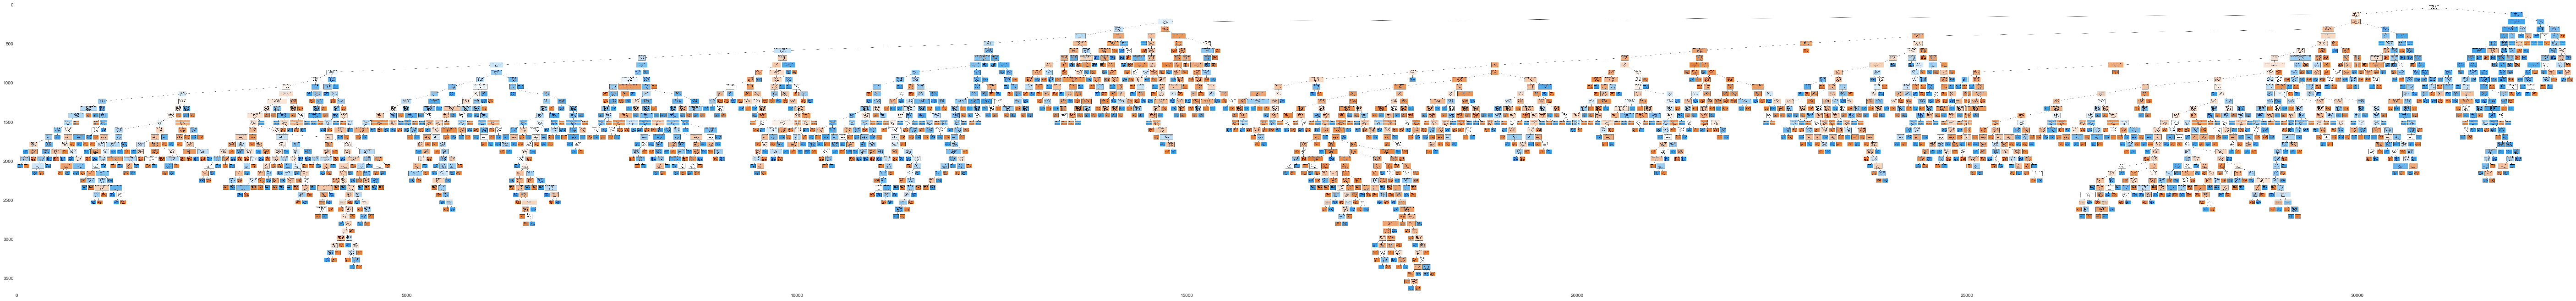

In [458]:
#target values must be a string (not integer) to create a decision tree visual
dot_data = StringIO()
filename = "traffictree.png"
featureNames = df.columns
targetNames = data["Y_N"].unique().tolist()
out=tree.export_graphviz(Tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(dty_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')